<a href="https://colab.research.google.com/github/adriansanchezroy/SecWebsite/blob/main/2_Introduction_%C3%A0_JavaScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration
---------------

Les cellules de cette section doivent être exécutées avant le reste du document. Si vous êtes déconnecté de l'engin d'exécution par Google Colab, il vous faudra exécuter cette section de nouveau.

In [ ]:
!pip3 install classroom-extensions

In [ ]:
%load_ext classroom_extensions.web

# JavaScript: Historique et philosophie
------

## Historique  

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Brendan_Eich_Mozilla_Foundation_official_photo.jpg/240px-Brendan_Eich_Mozilla_Foundation_official_photo.jpg" width="200px" align="right"/>

*JavaScript had to "look like Java" only less so‚ be Java’s dumb kid brother or boy-hostage sidekick. Plus‚ I had to be done in ten days or something worse than JavaScript would have happened (Brendan Eich).*

* Brendan Eich a créé la première version de JavaScript en 1995 lorsqu'il travaillait chez Netscape Communications, avec pour objectif principal de doter les pages web de fonctionnalités interactives et dynamiques.

* À l'époque, les pages web étaient principalement statiques, et il était évident que quelque chose de plus puissant était nécessaire pour permettre aux utilisateurs d'interagir avec le contenu.

* JavaScript est né pour répondre à ce besoin en tant que langage de programmation côté client, capable de manipuler le DOM et de rendre les pages web plus réactives.
  - JavaScript est basé sur le langage `Self`, mais conçu pour ressembler à Java.
  - Standardisé en 2000 ([ECMAScript](https://en.wikipedia.org/wiki/ECMAScript)).

## Philosophie

* En JavaScript presque tout est un objet, incluant les fonctions, les types non-primitifs, et même les classes.
  - Contrairement à d'autres langages orientés objet plus stricts, JavaScript adopte un modèle de programmation orienté prototype.
  - Les objets peuvent être créés à partir de prototypes existants, permettant ainsi la réutilisation de propriétés et de méthodes déjà définies.


* JavaScript est un langage de programmation qui se distingue par son **typage dynamique.**
    - Contrairement aux langages à typage statique, comme C++ ou Java, où les types de données doivent être déclarés explicitement et respectés rigoureusement, JavaScript ne nécessite pas cette étape.
    - Pas de vérification avant l'éxécution (sauf si le [mode strict](https://developer.mozilla.org/fr/docs/Web/JavaScript/Reference/Strict_mode) est utilisé).
    - Le type d'une variable est défini dynamiquement et peut changer au cours de l'exécution du programme (*duck typing*).
    - Des erreurs à l'exécution peuvent survenir, dont certaines peuvent être attrapées à compilation dans d'autres langages compilés.

* Les programmeurs font des erreurs:
    - Si une exception est lancée, l'exécution se poursuit au lieu de s'arrêter (comportement hérité des navigateurs).

* En JavaScript, le code n'est pas différent des données.
    - Il est possible d'exécuter du code dynamiquement, par ex., via la fonction `eval()`.

* Les fonctions peuvent être appelées avec moins ou plus d'arguments que
nécessaire (fonctions variadiques).

**Note:** `eval()` est une [fonction dangereuse](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/eval#never_use_eval!), qui exécute le code fourni en argument avec les privilèges de l'appelant. Si vous exécutez `eval()` avec une chaîne qui pourrait être affectée par une partie malveillante, vous risquez d'exécuter un code malveillant sur la machine de l'utilisateur avec les autorisations de votre page Web/extension.

## Exécution de code JavaScript sur Colab

In [ ]:
%%javascript

let a = eval('2 + 3');
console.log("Résultat: " + a);
console.warn("Warning");

<classroom_extensions.web.JavascriptWithConsole object>

## Inclusion de code JavaScript

* Directement dans la page HTML:

In [ ]:
%%html

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <title>Javascript dans le fichier HTML</title>
</head>
<body>
<script>
  let a = 3;
  let b = 2;
  document.writeln(`${a} + ${b} = ` + (a + b));
  document.writeln("<br>");
  let c = '2 + 3';
  document.writeln(c + " = " + eval(c));
</script>
</body>
</html>

* Dans un fichier `.js` externe:

In [ ]:
%%writefile js-external.js

const myFunction = function () {
    let a = 3;
    let b = 2;
    const div = document.getElementById("content");
    div.innerHTML = `<p> ${a} + ${b} = ${a + b} </p>`;
    let c = '2 + 3';
    div.innerHTML += ("<p>" + c + " = " + eval(c) + "</p>");
}

Writing js-external.js


In [ ]:
%http_server --port=8000 --directory=/content

Stopping any server listening on port 8000...
Starting server listening on port 8000...


In [ ]:
%%html

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <title>Javascript dans un fichier externe</title>
    <script type="text/javascript" src="http://localhost:8000/js-external.js"></script>
</head>
<body>
    <div id="content"></div>
    <button type="button" onclick="myFunction();">Cliquez ici!</button>
</body>
</html>

### **Remarque:**

La deuxième approche est évidemment préférable car elle permet un découplage clair de la structure du document (HTML) du code JavaScript (même principe pour les feuilles de style CSS). Par contre, dans les cahiers Google Colab, nous incluons du code JavaScript dans la page HTML même pour rendre les exemples plus courts et plus faciles à comprendre.

# Éléments de base
-----------

Cette section introduit quelques éléments de base du langage de programmation JavaScript.

## Commentaires

* Les commentaires sont utiles pour documenter votre code JavaScript:
    - Toute ligne débutant par `//` est ignorée.
    - Sur une ligne‚ tout ce qui suit `//` est ignoré.
    - Tout ce qui est compris entre `/*` et `*/` est ignoré (utile pour les commentaires multi-lignes).

In [ ]:
%%javascript

// Cette ligne sera ignorée par l'engin JavaScript
let x = 2; // Cette partie de la ligne sera ignorée
/* Ces deux lignes seront
   ignorées par l'engin JavaScript */

## Déclaration de variables

* En JavaScript, vous pouvez déclarer des variables (aussi appelées *bindings*) en utilisant les mots-clés `var`, `let` ou `const`.

* Le mot-clé [`const`](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Statements/const) permet de déclarer des constantes.

* Similaire à Python, il n'a pas besoin de spécifier le type des variables (comme en Java‚ C++‚ C#‚ etc.). Sauf si vous utilisez [TypeScript](https://github.com/microsoft/TypeScript).

* Une variable peut prendre une valeur de n'importe quel type.
```javascript
let nombre = 10;          // type number
let texte = "Bonjour";    // type string
let estVrai = true;       // type boolean
let tableau = [1, 2, 3];  // type array
let objet = { nom: "Alice", age: 25 }; // type object
const PI = 3.1415;        // la valeur de PI ne peut plus changer
let sansValeur = null;    // type spécial qui signifie sans valeur
let nonDefinie = undefined  // autre type spécial, comme null
```

**Remarque:** Il est préférable d'utiliser `let` et `const` tant que possible au lieu de `var`.

In [ ]:
%%javascript

var fruit = "Orange";

if (true) {
  var fruit = "Pomme";
  console.log("Dans la structure if: " + fruit);
}

console.log("Hors de la structure if: " + fruit);

<classroom_extensions.web.JavascriptWithConsole object>

In [ ]:
%%javascript

let fruit = "Orange";

if (true) {
  let fruit = "Pomme";
  console.log("Dans la structure if: " + fruit);
}

console.log("Hors de la structure if: " + fruit);

<classroom_extensions.web.JavascriptWithConsole object>

* Pour plus de détails sur le mot-clé [`let`](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Statements/let).

## Déclaration de constantes

* La déclaration d'une constante permet de déclarer une "variable" dont la valeur ne peut pas changer:

<img alt="" src="https://b1694534.smushcdn.com/1694534/wp-content/uploads/2021/06/variable.jpeg?lossy=1&strip=1&webp=1" width="300px"/>

In [ ]:
%%javascript

const nombre = 4;
nombre = 5; // TypeError

<classroom_extensions.web.JavascriptWithConsole object>

* Si la variable est une référence vers un objet, alors il est permis de modifier l'objet.

In [ ]:
%%javascript

const tableau = [1,2];
tableau.push(3); // Permis

console.log(`Contenu de tableau: ${tableau}`);

<classroom_extensions.web.JavascriptWithConsole object>

## Types et valeurs des variables

JavaScript permet plusieurs types de variables:

* **Nombre:** utilisé pour représenter les valeurs numériques. Cela inclut à la fois les nombres entiers et les nombres à virgule flottante.
    ```javascript
    13, 8.76, 1.997e8 (199700000)
    ```

* **Nombres speciaux:** JavaScript propose deux types de nombres spéciaux : `Infinity` qui représente une valeur mathématique infinie, et `NaN` utilisé pour indiquer un résultat indéfini ou non numérique.
    ```javascript
    Infinity                  // nombre positif trop grand pour être représenté
    Number.POSITIVE_INFINITY  // même valeur
    1/0                       // Infinity
    Number.MAX_VALUE * 2      // Infinity
    -Infinity                 // nombre négatif trop grand pour être représenté
    Number.NEGATIVE_INFINITY  // même valeur
    -1/0                      // -Infinity
    -Number.MAX_VALUE * 2     // -Infinity
    ```

* **BigInt** introduit par ES2020, est utilisé pour représenter des entiers extrêmement grands de taille arbitraire, dépassant les limites du type de données `number`
    ```javascript
    1234567890123456789012345678901234567890n
    BigInt(123)
    ```


* **Booléen:**
    ```javascript
    true, false
    ```

* **Chaîne de caractères:** utilisé pour représenter des séquences de caractères, comme du texte.
    ```javascript
    'Salut'                          // guillemets simples
    "Salut, comment ça va?"          // guillemets doubles
    `la moitie de 100 vaut ${100/2}` // à partir de ES6
    ```

    ```javascript
    "Salut,\
    comment\
    ça va?"
    ```
    
    ```javascript
    `Le bon sens est la chose au monde la mieux partagée :
    car chacun pense en être bien pourvu.`
    ```


* **Tableau:** utilisé pour stocker une collection ordonnée d'éléments, tels que des nombres, des chaînes de caractères ou même d'autres tableaux.
    ```javascript
    [1, 2, 3, 4, 5]
    ["pomme", "banane", "orange"]
    [[1,2],[2,3]]
    ```
* **Date:** type objet utilisé pour représenter les dates et heures.
  ```javascript
  let date = new Date();          // date actuel
  let annee = date.getFullYear(); // Obtient l'année actuelle
  let mois = date.getMonth();     // Obtient le mois actuel
  let jour = date.getDate();      // Obtient le jour du mois actuel
  ```

* **Objet:**
    - On vera des exemples plus tard.


### **Exemples:**

In [ ]:
%%javascript

let a = 10;
let b = 9.7;
let c = 1.997e8;
let d = 2 + 3;

console.log(`a = ${a}, b = ${b}, c = ${c}, d = ${d}`);

let myVariable = a + 5.5;
console.log("myVariable: " + myVariable);

let funnyNumber = "a" + a;
console.log(`funnyNumber: ${funnyNumber}`);

let myString = "Bonjour le monde !";
let badNumber = b / myString;           // NaN, pas possible de diviser par une chaine
console.log(`badNumber: ${Number.isNaN(badNumber)}`);

// Les nombres plutot speciaux
console.log("Number.MAX_VALUE: " + Number.isFinite(Number.MAX_VALUE));

let longString = myString + " JavaScript !";
console.log(longString);

let anotherString = `La moitie de 100: ${100 / 2}`;
console.log(anotherString);

<classroom_extensions.web.JavascriptWithConsole object>

## Opérateurs arithmétiques

* **Assignation:** `=` pour définir la valeur d'une variable.
* **Opérateurs arithmétiques de base:** `+`, `-`, `*`, `/`, `%` (modulo), ()
    - `foo += 1` est équivalent à `foo = foo + 1`
* **Pré/post incrémentation:** `foo++`,`++foo`

### Exemples:

In [ ]:
%%javascript

let foo = 5;
foo = foo + 1 - 2 * (4 - 1);
console.log("foo = " + foo); // 0

let bar = 4;
bar += bar++;
console.log("bar = " + bar);  // 8

let baz = 4;
baz += ++baz;
console.log("baz = " + baz);  // 9

<classroom_extensions.web.JavascriptWithConsole object>

## Opérateurs de comparaison

* Opérateurs génériques (attention, peuvent effectuer du `casting`):
    - Égal: `==`
    - Différent de: `!=`
    - Plus grand que: `>`
    - Plus grand ou égal à: `>=`
    - Plus petit que: `<`
    - Plus petit ou égal à: `<=`
* Opérateurs spécifiques à JavaScript:
    - Égal et du même type: `===`
    - Différent ou d'un type différent: `!==`

### Exemples:

In [ ]:
%%javascript

let x = 5;
console.log(`x == 5 :  ${x == 5}`);        // true
console.log(`x != 4 :  ${x != 4}`);        // true
console.log(`x > 5 : ${x > 5}`);           // false
console.log(`x >= 5 : ${x >= 5}`);         // true
console.log(`x < 5 : ${x < 5}`);           // false
console.log(`x <= 5 : ${x <= 5}`);         // true

console.log(`x == 5 : ${x === 5}`);         // true
console.log(`x === "5" : ${x === "5"}`);    // false
console.log(`x !== 5 : ${x !== 5}`);        // false
console.log(`x !== "5" : ${x !== "5"}`);    // true

let foo = "Pommes";
console.log(`foo == "Pommes" ${foo == "Pommes"}`);      // true
console.log(`foo === Pommes :  ${foo === "Pommes"}`);   // true
console.log(`foo != "Oranges" : ${foo != "Oranges"}`);  // true
console.log(`foo !== "42" : ${foo !== "42"}`);          // true

let y = "5";
let z = 5;
console.log(`x == 5 : ${y == 5}`);    // true
console.log(`x === 5 : ${y === 5}`);  // false
console.log(`y === 5 : ${z === 5}`);  // true

<classroom_extensions.web.JavascriptWithConsole object>

## Opérateurs logiques

* `x && y`: `true` si `x` et `y` sont `true`
* `x || y`: `true` si au minimum `x` ou `y` est `true`
* `!x`: `true` si `x` est `false`
* Les parenthèses sont permises.

## Conversion automatique de types

* Lorsqu'un opérateur est appliqué au mauvais type de valeur, Javascript essaiera de convertir la valeur, un processus souvent appelé coercition de type et dont le résultat peut ne pas correspondre à ce que vous attendiez.

* Pour plus d'information sur la conversion automatique de types en JavaScript, regardez [cette page de la communauté Mozilla](https://developer.mozilla.org/fr/docs/Web/JavaScript/Equality_comparisons_and_sameness)

### Exemples:

In [ ]:
%%javascript

console.log(8 * null)     // 0
console.log("5" - 1)      // 4
console.log("5" + 1)      // 51
console.log("five" * 2)   // NaN
console.log(false == 0)   // true

<classroom_extensions.web.JavascriptWithConsole object>

* Pour éviter la coercion de types et comparer des valeurs de façon stricte, vous pouvez utiliser les opérateurs de comparaison `===` et `!==`

## Conversion explicite de types

* La conversion explicite de types en JavaScript, également appelée *cast*, permet de changer temporairement le type d'une valeur d'une forme à une autre.

* Vous pouvez utiliser les fonctions `Boolean()`, `Number()` et `String()` pour convertir des valeurs:

In [ ]:
%%javascript

let texte = "123";
let nombre = Number(texte); // Convertit en nombre
let valeur = 456;
let chaine = String(valeur); // Convertit en chaîne de caractères
let zero = 0;
let estVrai = Boolean(zero); // Convertit en booléen

console.log(`nombre: ${nombre}, chaine: ${chaine}, estVrai: ${estVrai}`);

<classroom_extensions.web.JavascriptWithConsole object>

* On peut également utiliser plusieurs méthodes des objets à cette fin.

In [ ]:
%%javascript

let n = 18;
let binaire = "0b" + n.toString(2);     // 0b10010
let octal = "0o" + n.toString(8);       // 0o22
let hex = "0x" + n.toString(16);        // 0x12

console.log(`binaire: ${binaire}, octal: ${octal}, hex: ${hex}`);

let m = 123456.789;
console.log(m.toFixed(0));              // 123457
console.log(m.toFixed(2));              // 123456.79
console.log(m.toFixed(6));              // 123456.789000
console.log(m.toExponential(3));        // 1.235e+5
console.log(m.toPrecision(1));          // 1e+5
console.log(m.toPrecision(10));         // 123456.7890

console.log(parseInt("3 oranges"));                 // 3
console.log(parseInt("3.53 kilos d'oranges"));      // 3
console.log(parseInt("-34.67"));                    // -34
console.log(parseFloat("0.3"));                     // 0.3

<classroom_extensions.web.JavascriptWithConsole object>

# Les structures conditionnelles
-----------------

Les structures conditionnelles en JavaScript sont des outils puissants pour exécuter des blocs de code en fonction de certaines conditions. Ces structures permettent au programme de prendre des décisions et de réagir différemment en fonction de différentes situations.

## La structure conditionnelle `if`

* Exécute un bloc de code si une condition évalue à `true`, et un autre bloc si la condition est `false` (optionnel).

* **condition** est une expression **booléenne**.
```javascript
 if (condition) {
    // Instructions à exécuter si la condition est vraie
}

 if (condition) {
    // Instructions à exécuter si la condition est vraie
} else {
    // Instructions à exécuter si la condition est fausse
}
```

* En omettant les accolades `{` `}`, une seule instruction est permise après le `if` / `else`
```javascript
if (condition)
	console.log("Cette ligne s'exécute si la condition est vraie");
console.log("Cette ligne va toujours s'exécuter");
```

* Le code ci-dessous:
```javascript
if ( isBetween(15, 10, 20) ) {
	console.log("Nombre dans la plage!");
} else {
	console.log("Nombre hors plage!");
}
```
est équivalent à:
```javascript
if ( (15 >= 10) && (15 <= 20) ) {
	console.log("Nombre dans la plage!");
} else {
	console.log("Nombre hors plage!");
}
```

* Les énoncés `if` peuvent être imbriqués:
```javascript
if ( isBetween(15, 10, 20) ) {
    if ( isBetween(15, 14, 16) ) {
        console.log("Excellent!");
    } else {
        console.log("Bien.");
    }
} else {
    console.log("Mauvais!");
}
```

* L'instruction `else if` permet de vérifier plusieurs conditions successives et d'exécuter le bloc de code correspondant à la première condition vraie. Par exemple :

In [ ]:
%%javascript

let score = 75;
let grade = "";

if ( score >= 80 ) {
    grade = "A";
} else if (score >= 70) {
    grade = "B";
} else if (score >= 60) {
    grade = "C";
} else if (score >= 50) {
    grade = "D";
} else {
    grade = "F";
}

console.log("Votre résultat est " + grade);

<classroom_extensions.web.JavascriptWithConsole object>

## La structure `switch`

* La structure `switch` est utilisée pour effectuer des actions différentes en fonction de la valeur d'une expression. Elle offre une alternative à l'utilisation répétée d'instructions `if...else if...else` pour gérer plusieurs conditions:
```javascript
switch (expression) {
  case valeur1:
    // Instructions à exécuter lorsque le résultat
    // de l'expression correspond à valeur1
    break; // optionnel
  case valeur2:
    // Instructions à exécuter lorsque le résultat
    // de l'expression correspond à valeur2
    break; // optionnel
  // ...
  case valeurN:
    // Instructions à exécuter lorsque le résultat
    // de l'expression à valeurN
    break; // optionnel
  default: // bloc optionnel
    // Instructions à exécuter lorsqu'aucune des valeurs
    // ne correspond
    break; // optionnel
}
```

### **Exemples:**

In [ ]:
%%javascript

let expr = "Oranges";

switch (expr) {
  case "Oranges":
    console.log("Oranges : 0.59 $ le kilo.");
    break;
  case "Pommes":
    console.log("Pommes : 0.32 $ le kilo.");
    break;
  case "Bananes":
    console.log("Bananes : 0.48 $ le kilo.");
    break;
  case "Cerises":
    console.log("Cerises : 3.00 $ le kilo.");
    break;
  case "Mangues":
  case "Papayes":
    console.log("Mangues et papayes : 2.79 $ le kilo.");
    break;
  default:
    console.log("Désolé, nous n'avons plus de " + expr + ".");
}

console.log("Autre chose ?");

<classroom_extensions.web.JavascriptWithConsole object>

In [ ]:
%%javascript

let day = 2;

switch (day) {
  case 1:
  case 2:
  case 3:
  case 4:
  case 5:
    console.log("J'attends le week-end avec impatience");
    break;
  case 6:
    console.log("Samedi");
    break;
  case 7:
    console.log("Dimanche");
    break;
  default:
    console.log("Jour invalide");
}

<classroom_extensions.web.JavascriptWithConsole object>

# Les boucles
---------

Les structures de boucle permettent d'exécuter un bloc de code de manière répétée, en fonction d'une condition ou d'un certain nombre d'itérations.

* Type de boucles disponibles:
  - `for`: bloc de code typiquement répété *n* fois
    - `for...of`: crée une boucle itérative sur des objets itérables, y compris : `String`, `Array`, objets de type tableau intégrés, etc, et itérables définis par l'utilisateur.
    - `for...in`: itère sur toutes les propriétés énumérables d'un objet qui sont indexées par des chaînes.
  - `while`: bloc de code répété tant qu'une `condition` est `true`.
    - Si la `condition` est fausse initialement, aucune itération n'aura lieu.
  - `do while`: bloc répété tant que qu'une `condition` est `true`.
    - Une première itération surviendra toujours, même si la `condition` est initialement fausse.

## Boucles `for`

* La boucle `for` est utilisée pour exécuter un bloc de code un nombre déterminé de fois. Elle comprend une *initialisation*, une *condition de continuation* et une *expression d'itération*. Par exemple :
```javascript
for (initialisation; condition; expression iteration) {
	// instructions à exécuter
}
```

Quelques détails:

* On utilise généralement *i* comme variable de boucle. Pour une boucle
imbriquée, on peut utiliser *j* (et même *k*)
* La condition initiale sert généralement à assigner la valeur de départ (par ex., `0`) de la variable de boucle.
* L'expression d'itération de la boucle consiste habituellement en
un énoncé tel que `i++` ou `i += 2`

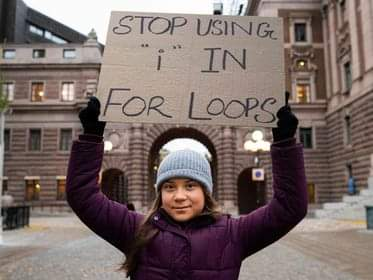

### Exemples:

In [ ]:
%%javascript

for (let n = 0; n <= 5; n++) {
  console.log(n);
}

<classroom_extensions.web.JavascriptWithConsole object>

In [ ]:
%%javascript

for (let n = 20; ; n++) {
  if (n % 7 == 0) {
    console.log(n);
    break;
  }
}

<classroom_extensions.web.JavascriptWithConsole object>

## Boucles `while`

* La boucle `while` exécute un bloc de code tant qu'une condition spécifiée est vraie.
```javascript
while (condition) {
	// instructions à executer
}
```

**Exemple:**

In [ ]:
%%javascript

let compteur = 0;

while (compteur < 3) {
  console.log("Itération #" + compteur);
  compteur++;
}

<classroom_extensions.web.JavascriptWithConsole object>

## Boucles `do...while`

* La boucle `do...while` est similaire à `while`, mais elle garantit qu'au moins une itération sera effectuée avant de vérifier la condition.
```javascript
do {
    // fait quelque chose...
} while (condition);
```

**Exemple:**

In [ ]:
%%javascript

let x = 0;

do {
  console.log("Valeur de x : " + x);
  x++;
} while (x < 3);

<classroom_extensions.web.JavascriptWithConsole object>

# Activités en classe

----------

## FizzBuzz

* Cet exercice s'agit en fait d'une question d'entretien qui a prétendu éliminer un pourcentage important de candidats programmeurs. Si vous le résolvez vous-même, votre valeur vient d'augmenter.
* Étant donné un nombre entier *n* comme argument d'entré du programme, affichez les entiers *1* à *n* séparés par des virgules, mais imprimez *Fizz* si un entier est divisible par *3*, *Buzz* si un entier est divisible par *5* et *FizzBuzz* si un entier est divisible par *3* et *5*.

<!--

for (let n = 1; n <= 50; n++) {
    let result = "";
    if (n % 3 == 0)
        result += "Fizz";
    if (n % 5 == 0)
        result += "Buzz";
    console.log(result);
}

for (let number = 1; number <= 50; number++) {
  if (number % 3 == 0 && number % 5 == 0) {
    console.log("FizzBuzz" + " : " + number)
  } else if (number % 3 == 0){
    console.log("Fizz" + " : " + number)
  } else if (number % 5 == 0) {
    console.log("Buzz" + " : " + number)
  }
}

-->

In [ ]:
%%javascript

// Complétez le code...
// for (let n = 1; n <= 50; n++) {
//     let result = "";
//     if (n % 3 == 0)
//         result += "Fizz";
//     if (n % 5 == 0)
//         result += "Buzz";
//     console.log(result);
// }

for (let number = 1; number <= 50; number++) {
  if (number % 3 == 0 && number % 5 == 0) {
    console.log("FizzBuzz" + " : " + number)
  } else if (number % 3 == 0){
    console.log("Fizz" + " : " + number)
  } else if (number % 5 == 0) {
    console.log("Buzz" + " : " + number)
  }
}

<classroom_extensions.web.JavascriptWithConsole object>

## Triangle

* Écrivez une boucle qui effectue sept appels à console.log pour afficher le triangle suivant :

```
#
##
###
####
#####
######
#######
```

<!--

for (let dashes = "#"; dashes.length < 8; dashes += "#")
    console.log(dashes);

-->

<!--
for (let a = 1; a < 8; a++) {
  let ligne = "";
  for (let b = 0; b < a ; b++) {
     ligne += "#";
  }
  console.log(ligne);
}
-->

In [ ]:
%%javascript

// Complétez le code...
for (let dashes = "#"; dashes.length < 8; dashes += "#")
    console.log(dashes);

// for (let a = 1; a < 8; a++) {
//   let ligne = "";
//   for (let b = 0; b < a ; b++) {
//      ligne += "#";
//   }
//   console.log(ligne);
// }

<classroom_extensions.web.JavascriptWithConsole object>

# Fonctions
-----------

Les fonctions visent à encapsuler un comportement commun et à éviter la répétition de code. Il existe plusieurs façons de définir des fonctions en JavaScript, chacune adaptée à des besoins spécifiques.

## Une fonction comme variable/expression

* Une fonction enveloppe une portion de code et l'affecte à une variable (ou *binding*). Une fonction est donc une variable régulière dont la valeur est la fonction.

* Les expressions de fonction créent des fonctions anonymes assignées à des variables. Elles sont souvent utilisées pour les fonctions comme des arguments ou les fonctions de rappel.


* Exemple de définition d'une fonction `square()`:

In [ ]:
%%javascript

const square = function(x) {
  return x * x;
};

console.log(square(4));

<classroom_extensions.web.JavascriptWithConsole object>

* Une fonction est créée par une expression qui commence avec le mot-clé `function`
  - Elle peut avoir des paramètres (`x` dans le cas de `square()` et retourner une valeur.
  - Certaines fonctions n'ont pas de paramètres et ne renvoient aucune valeur.

* Quelques exemples de fonctions:

In [ ]:
%%javascript

const makeNoise = function() {
  console.log("boo !");
};

makeNoise();

const power = function(base, exponent) {
  let result = 1;

  for (let count = 0; count < exponent; count++) {
    result *= base;
  }

  return result;
};

console.log(power(2, 4));

<classroom_extensions.web.JavascriptWithConsole object>

## Syntaxe de déclaration

* La déclaration de fonction est une méthode courante pour définir une fonction nommée. Elle peut être utilisée avant ou après son appel dans le code.

In [ ]:
%%javascript

function areaOfCircle(radius) {
    return Math.PI * square(radius);
}

function square(x) {
  return x * x;
}

let area = areaOfCircle(2);
console.log("Aire d'un cercle de rayon 2: " + area);

<classroom_extensions.web.JavascriptWithConsole object>

* Le code ci-dessous démontre une différence entre les deux façons de déclarer une fonction:

In [ ]:
%%javascript

console.log("The most reliable way to forecast the future is " + response());

function response() {
  return "to try to understand the present. John Naisbitt";
}

console.log("Strategic planning is worthless " + complete()); // ReferenceError: can't access lexical declaration 'complete' before initialization

const complete = function() {
  return " - unless there is first a strategic vision. John Naisbitt";
};

<classroom_extensions.web.JavascriptWithConsole object>

### *Remarques:*

* L'anglicisme *hoisting*, qu'on peut traduire en **remontée** correspond au déplacement de la déclaration de fonctions, variables ou classes en haut de leur portée avant l'exécution du code.

* En realité le *hoisting* est un processus qui déclare des variables et des fonctions dans l'espace mémoire **avant** l'affectation et l'initialisation dans la portée d'exécution donnée.

* Pour [plus d'informations](https://developer.mozilla.org/fr/docs/Glossary/Hoisting).

## Fonctions fléchées

* La troisième façon de déclarer une fonction consiste à utiliser une flèche (`=>`) au lieu du mot-clé `function`. Les fonctions fléchées sont une syntaxe concise pour définir des fonctions, mais elles ne créent pas leur propre contexte `this`.

In [ ]:
%%javascript

const power = (base, exponent) => {
  let result = 1;
  for (let count = 0; count < exponent; count++) {
    result *= base;
  }
  return result;
};

console.log(power(2, 4));

<classroom_extensions.web.JavascriptWithConsole object>

* Cette façon de déclarer des fonctions permet de créer des fonctions plus courtes et d'écrire moins de code.

In [ ]:
%%javascript

const square1 = (x) => {return x * x; };
const square2 = x => x * x;

console.log(square1(2));
console.log(square2(4));

<classroom_extensions.web.JavascriptWithConsole object>

## Fonctions imbriquées

* En JavaScript, les fonctions peuvent être imbriquées (contrairement à C ou Java).
* Une fonction imbriquée est une fonction définie à l'intérieur d'une autre fonction.

<img alt="" src="https://camo.githubusercontent.com/52fc050bdd6d5bee2bacf34c3130df1ab0a18974f1ee5a33fd012610787d7059/68747470733a2f2f692e696d6775722e636f6d2f7978696b6869592e6a7067" width="350px"/>

**Exemple:** `square()` peut être invoquée uniquement à l'intérieur
de `areaOfCircle()` :


In [ ]:
%%javascript

function areaOfCircle2(radius) {

  function square(x) {
    return x * x;
  }

  return Math.PI * square(radius);
}

let area = areaOfCircle2(2);
console.log("Aire d'un cercle de rayon 2: " + area);

<classroom_extensions.web.JavascriptWithConsole object>

## Portée des variables

* **Portée globale:** la variable est utilisable par tout le code JavaScript dans le contexte de la page (par ex. `window`).
* **Portée locale:** la variable est utilisable au sein de la fonction et
des sous-fonctions (`sq`)
* **Paramètres:** même portée que la portée locale (ces derniers se comportent
comme des variables de portée locale) (`radius, x`)

**Exemple:**

In [ ]:
%%javascript

function areaOfCircle3(radius) {

  // Ceci est une fonction imbriquée
  function piSquare(x) {
    let sq = x * x;
    return Math.PI * sq;
  }

  return piSquare(radius);
}

let area = areaOfCircle3(2);
console.log("Aire d'un cercle de rayon 2: " + area);

<classroom_extensions.web.JavascriptWithConsole object>

## Arguments optionnels / défauts

* Le code ci-dessous est accepté et exécuté correctement par JavaScript:

In [ ]:
%%javascript

function square(x) {
  return x * x;
}

console.log("Square: " + square(2, false, "chats et chiens"));

<classroom_extensions.web.JavascriptWithConsole object>

* La fonction `square` est définie avec un seul paramètre. Pourtant, lorsque nous l'appelons avec trois, l'engin JavaScript ne se plaint pas. Il a simplement ignoré les arguments supplémentaires.

* Si on fournit moins d'arguments que ce qu'une fonction attend, les paramètres manquants recevront la valeur `undefined`.

**Exemple:**

In [ ]:
%%javascript

function minus(a, b) {
  if (b === undefined) return -a;
  else return a - b;
}

console.log(minus(5));
console.log(minus(10, 5));

<classroom_extensions.web.JavascriptWithConsole object>

* Nous pouvons aussi définir des valeurs défauts à certains paramètres. Si un appel de fonction ne fournit pas l'argument nécessaire, le paramètre prendra la valeur défaut.

In [ ]:
%%javascript

function power(base, exponent = 2) {
  let result = 1;
  for (let count = 0; count < exponent; count++) {
    result *= base;
  }
  return result;
}

console.log(power(2));      // 4
console.log(power(2, 5));   // 32

<classroom_extensions.web.JavascriptWithConsole object>

<!-- * À l'aide des valeurs défauts, il est possible de définir des valeurs complexes, dont l'évaluation sera faite de manière "*lazy*".

```javascript
function startServer(ip="127.0.0.1", port=8080) {
	// ...
}
```

Il est possible de définir une valeur plus "complexe". L'évaluation sera faite de manière "*lazy*".

```javascript
function startServer(ip=AppConfig.getInstance().getServerIP(),
      port=AppConfig.getInstance().getServerPort()) {
	// ...
}
```-->

## Fermetures

* Les fermetures (*closures*) sont des fonctionnalités puissantes qui permettent à une fonction d'accéder aux variables d'une fonction extérieure, même après que cette fonction extérieure ait été exécutée.

* Les fermetures sont souvent utilisées pour créer des fonctions d'ordre supérieur et pour encapsuler des données privées.


<img alt="" src="https://www.jeet.world/content/images/size/w2000/2021/11/FEeJ0FTVkAEtkxo.jpeg" width="550px"/>

**Exemple:**

In [ ]:
%%javascript

function compteur() {
    let compte = 0;

    function increment() {
        compte++;
        console.log(compte);
    }

    return increment;
}

let inc = compteur(); // -> function()
inc(); // Affiche 1
inc(); // Affiche 2

let inc2 = compteur();
inc2();
inc2();

inc();

<classroom_extensions.web.JavascriptWithConsole object>

* Le code suivant montre autre exemple de fermeture. Il définit une fonction, `wrapValue()`, qui crée une liaison locale. La fonction `wrapValue()` renvoie ensuite une fonction flechée qui accède et renvoie cette liaison locale.

In [ ]:
%%javascript

function wrapValue(n) {
  let local = n;
  return () => local;
}

let wrap1 = wrapValue(1);
let wrap2 = wrapValue(2);

console.log(wrap1());   // 1
console.log(wrap2());   // 2
console.log(wrap2());   // 2

<classroom_extensions.web.JavascriptWithConsole object>

* Les deux instances de la liaison sont toujours accessibles. Cette situation est une bonne démonstration du fait que les variables locales sont créées à nouveau pour chaque appel, et que différents appels ne peuvent pas piétiner les variables locales les uns des autres.

* **Une fonction qui fait référence à des variables à partir de portées locales qui l'entourent est donc appelée une fermeture.**

* Ce comportement permet d'utiliser les valeurs de fonction de manière créative.

**Exemples:**

In [ ]:
%%javascript

function multiplier(factor) {
  // retourne une fonction flechée
  return number => number * factor;
}

let twice = multiplier(2);

console.log(twice(5));  // 10
console.log(twice(10));  // 20

<classroom_extensions.web.JavascriptWithConsole object>

In [ ]:
%%javascript

function adder(val) {

  let value = val;
  // Retourne une fonction afin d'effectuer son traitement
  return inc => {
    // Peut accéder aux variables locales de la fonction parent
    value += inc;
    return value;
	}
}

let plus5 = adder(5);

console.log(plus5(3)); // 8
console.log(plus5(2)); // 10

<classroom_extensions.web.JavascriptWithConsole object>

In [ ]:
%%javascript

function counter(initial) {
  let value = initial;

  // Renvoie des fonctions pour obtenir la valeur du compteur, l’incrémenter, et le réinitialiser
  return {
    get: function () { return value; },
    increment: function () { value += 1; },
    reset: function () { value = initial; }
  }
}

let counter1 = counter(5);
let counter2 = counter(10);

counter1.increment(); // 6
counter1.reset();     // 5
counter1.increment(); // 6

counter2.increment(); // 11
counter2.increment(); // 12

console.log(counter1.get(), counter2.get());

<classroom_extensions.web.JavascriptWithConsole object>

# Activités en classe
--------------



## Valeur dans un intervalle

* Implémentez une fonction qui reçoit trois arguments: `value`, `min` et `max`. La fonction doit renvoyer `true` si `value` se trouve dans l'intervalle/plage définie par `min` et `max`.

<!--
function isBetween(value, min, max) {
    return min <= value && value <= max;
}
-->

In [ ]:
%%javascript

// Complétez le code (fonction isBetween)...
function isBetween(value, min, max) {
    return min <= value && value <= max;
}

console.log(isBetween(2, 1, 5));   // true
console.log(isBetween(2, 10, 15)); // false

<classroom_extensions.web.JavascriptWithConsole object>

## Compteur de caractères

* Vous pouvez obtenir le *Nième* caractère, ou lettre, d'une chaîne en écrivant *chaîne[N]*. La valeur renvoyée sera une chaîne contenant un seul caractère (par exemple, "b"). Le premier caractère d'une chaîne est dans la position 0, et le dernier se trouve dans la position string.length - 1. En d'autres termes, une chaîne de deux caractères a une longueur de 2 et ses caractères ont les positions 0 et 1.

* Écrivez une fonction *countCs* qui prend une chaîne comme seul argument et renvoie un nombre qui indique le nombre de caractères "C" majuscules qu'il y a dans la chaîne. Ensuite, écrivez une fonction appelée *countChar* qui se comporte comme *countCs*, sauf qu'elle prend un deuxième argument qui indique le caractère à compter (plutôt que de ne compter que les caractères "C" majuscules). Réécrivez *countCs* pour utiliser cette nouvelle fonction.

<!--
function countChar(string, ch) {
    let count = 0;
    for (let i = 0; i < string.length; i++) {
        if (string[i] == ch) {
            count += 1;
        }
    }
    return count;
}

function countCs(string) {
    return countChar(string, "C");
}
-->

<!--

// version reduce
const countChar = (str, c) => [...str].reduce((prev, cur) => cur === c ? ++prev : prev, 0);

console.log(countChar("telephone", "e"));  // 3

-->

In [ ]:
%%javascript

// Complétez le code (fonctions countChar et countCs)...
function countChar(string, ch) {
    let count = 0;
    for (let i = 0; i < string.length; i++) {
        if (string[i] == ch) {
            count += 1;
        }
    }
    return count;
}

function countCs(string) {
    return countChar(string, "C");
}

console.log(countCs("BBC"));   // 1
console.log(countChar("telephone", "e"));  // 3

<classroom_extensions.web.JavascriptWithConsole object>

In [ ]:
%%javascript

const countChar = (str, c) => [...str].reduce( (prev, cur) => cur === c ? ++prev : prev, 0 );

console.log(countChar("telephone", "e"));  // 3

<classroom_extensions.web.JavascriptWithConsole object>

In [ ]:
%%javascript

const hello = "Salut tout le monde";
const a = [...hello];

console.log(a);

<classroom_extensions.web.JavascriptWithConsole object>

# Tableaux et objets
----------------

Les types primitifs sont les composants utilisés pour créer des structures plus complexes. Les objets nous permettent de regrouper des valeurs, y compris d'autres objets, pour construire des structures plus complexes. Cette section décrit les tableaux et introduit quelques concepts de base sur les objets en JavaScript. Nous étudierons les objets en détail dans les prochains cahiers.

## Les tableaux

* En JavaScript, un tableau est écrit sous la forme d'une liste de valeurs entre crochets, séparées par des virgules.

In [ ]:
%%javascript

let emptyArray = [];
let numbers = [1, 2, 3, 5, 7, 10];
let mixed = [1.1, true, "poires"];
let sizeFiveArray = Array(5);
let anotherArray = Array(1, 2, 3);
let yetAnotherArray = Array.of(1, 2, 3, 4);

console.log(numbers[2]);  // 3
console.log(numbers[0]);  // 1
console.log(mixed);       // 1.1,true,poires
console.log(emptyArray.length);             // 0
console.log(numbers[numbers.length - 1]);   // 10
console.log(sizeFiveArray.length);          // 5
console.log(anotherArray);                  // 1, 2, 3
console.log(yetAnotherArray);               // 1, 2, 3, 4

let anArray = [1, 2, 3];
let largerArray = [0, ...anArray, 4, 5];    // operateur spread ...
// let largerArray = [0, 1, 2, 3, 4, 5];    // operateur spread ...
console.log(largerArray);                   // 0,1,2,3,4,5

let sentence = [..."The secret code they created made no sense"];
console.log(sentence);      // T,h,e, ,s,e,c,r,e,t, ,c,o,d,e, ,t,h,e,y, ,c,r,e,a,t,e,d, ,m,a,d,e, ,n,o, ,s,e,n,s,e

<classroom_extensions.web.JavascriptWithConsole object>

* Presque toutes les valeurs JavaScript ont des propriétés. Les deux principales façons d'accéder aux propriétés en JavaScript sont avec un point et avec des crochets.
  - `value.x` et `value[x]` accèdent à une propriété sur `value`, mais pas nécessairement à la même propriété.
* La propriété `length` d'un tableau nous indique combien d'éléments il contient.

* Quelques méthodes des tableaux:
  - `push` : ajout d'un item à la fin d'un tableau.
  - `unshift` : ajout d'un item au début d'un tableau.
  - `pop` : retrait d'un item à la fin du tableau.

In [ ]:
%%javascript

let grades = [99, 96, 93, 91, 41];
grades.push(67);  // ajoute 67
grades.push(85);  // ajoute 85

console.log(grades);
// [99,96,93,91,41,67,85]

grades.unshift(99.5);  // ajoute 99.5

console.log(grades.pop());
// 85

delete grades[1]  // enlève le deuxième élément

console.log(grades);
// [99.5,,96,93,91,41,67]

<classroom_extensions.web.JavascriptWithConsole object>

* Javascript offre quelques façons de parcourir les tableaux:

In [ ]:
%%javascript

let grades = [99, 96, 93, 91, 41];

for (let i = 0; i < grades.length; i++) {
  console.log(grades[i]);
}

for (let grade of grades) {
  console.log(grade);
}

grades.forEach(grade => {
  console.log("Grade: " + grade);
});

<classroom_extensions.web.JavascriptWithConsole object>

* Pour rechercher une valeur spécifique dans un tableau, on peut utiliser la méthode `indexOf()`. La méthode parcourt le tableau du début à la fin et renvoie l'index auquel la valeur demandée a été trouvée, ou `-1` si elle n'a pas été trouvée.
* Pour rechercher à partir de la fin au lieu du début, il existe une méthode similaire appelée `lastIndexOf()`.

In [ ]:
%%javascript

console.log([70, 80, 85, 87, 90, 80].indexOf(80));      // 1
console.log([70, 80, 85, 87, 90, 80].lastIndexOf(80));  // 5

<classroom_extensions.web.JavascriptWithConsole object>

* Une autre méthode importante est `slice()`, qui prend les indices de début et de fin et renvoie un tableau qui ne contient que les éléments entre eux.

In [ ]:
%%javascript

let grades = [70, 80, 85, 87, 90, 80];

console.log(grades.slice(2, 5));  // [85,87,90]
console.log(grades.slice(3));     // [87,90,80]

<classroom_extensions.web.JavascriptWithConsole object>

## Opérateurs `rest`/`spread`

* La fonction [`Math.max()`](https://developer.mozilla.org/fr/docs/Web/JavaScript/Reference/Global_Objects/Math), qui permet d’obtenir la valeur maximale parmi un ensemble de valeurs, est un exemple de fonction variadique qui peut être implémentée de la façon suivante:

In [ ]:
%%javascript

// opérateur rest ...
function max(...values) {
  // 40, 50, 55, 88, 32, 99 => values = [40, 50, 55, 88, 32, 99]
  // 50, 60, 70, 55, 85 => values = [50, 60, 70, 55, 85]
  let maxvalue = -Infinity;
  for (let value of values) {
    if (value > maxvalue) maxvalue = value;
  }
  return maxvalue;
}

console.log(max(40, 50, 55, 88, 32, 99));

let grades = [50, 60, 70, 55, 85];
//  [50, 60, 70, 55, 85] =>  50, 60, 70, 55, 85
console.log(max(...grades));          // opérateur spread ...

<classroom_extensions.web.JavascriptWithConsole object>

* Le paramètre rest `...values` est relié à un tableau qui contient la liste des arguments fournis à la fonction. On peut appeler `max()` avec un tableau d'arguments et l'opérateur `...` Dans ce cas les éléments du tableau sont *repartis* (spread) et passés comme arguments de la fonction.

## Les objets

Les objets sont des structures de données clés en JavaScript, utilisées pour stocker et organiser des informations sous forme de paires clé-valeur. Les objets permettent de représenter des entités, des propriétés et des fonctionnalités dans le langage.

In [ ]:
%%javascript

let empty = {};
let point = { x: 3, y: 4};
let newPoint = { x: point.x, y: point.y * 2};

let vehicle = {
  brand: "Toyota",
  model: "Corolla",
  year: 2010
};

console.log(point.x, point.y);    // 3 4
console.log(vehicle.brand);       // Toyota
console.log("Sold:" + vehicle.sold);   // undefined
vehicle.sold = false;
console.log(vehicle.sold);        // false

<classroom_extensions.web.JavascriptWithConsole object>

* À l'intérieur des accolades, il y a une liste de propriétés séparées par des virgules. Chaque propriété a un nom suivi de `:` et d'une valeur.
* L'opérateur binaire `in`, lorsqu'il est appliqué à une chaîne et à un objet, vous indique si cet objet a une propriété portant ce nom.
* Pour connaître les propriétés d'un objet, vous pouvez utiliser la fonction `Object.keys()`

In [ ]:
%%javascript

let vehicle = {
  brand: "Toyota",
  model: "Corolla",
  year: 2010
};

console.log(Object.keys(vehicle));  // ["brand","model","year"]

console.log("Propriétés de l'objet et leurs valeurs:")
for (let key in vehicle) {
  console.log("vehicle[" + key + "] = " + vehicle[key]);
}

<classroom_extensions.web.JavascriptWithConsole object>

### Accès, ajout et modification de propriétés

* Pour accéder à des propriétés des objets, on utilise le point `.` ou les `[]`. On peut également les utiliser pour ajouter ou modifier les valeurs des propriétés.

In [ ]:
%%javascript

let book = {
  title: "The Great Gatsby",
  author: "F. Scott Fitzgerald",
  year: 1925,
  genre: "Novel",
  pages: 180,
  isAvailable: true,
  summary: "A story of decadence, idealism, social upheaval, and excess in the Jazz Age.",

  getInfo: function() {
    return `${this.title} by ${this.author}, ${this.year}`;
  }
};

console.log(book.title);     // The Great Gatsby
console.log(book.author);    // F. Scott Fitzgerald
console.log(book["pages"]);  // 180

let genre = "genre";
console.log(book[genre]);    // "Novel"

console.log(book.getInfo());  // The Great Gatsby by F. Scott Fitzgerald, 1925
console.log("Subtitle:" + book.subtitle);   // undefined


// Accès conditionnel à partir d'ES2020:

// Le problème:
console.log(book.subtitle.length);   //  TypeError: book.subtitle is undefined

// Une possible solution
let familyName = undefined;
if (book) {
  if (book.author) {
    surname = book.author.familyName;
  }
}

// autre solution
familyName = book && book.author && book.author.familyName;

// accès conditionnel à partir de ES2020
familyName = book?.author?.familyName;

<classroom_extensions.web.JavascriptWithConsole object>

# Les chaînes de caractères
----------------

Les valeurs de type chaîne, nombre et booléen sont immuables, ce qui veut dire qu'on ne peut pas ajouter de nouvelles propriétés. Nous pouvons, en tout cas, utiliser des méthodes des chaînes pour obtenir des informations et créer de nouvelles chaînes.

* Chaque valeur de chaîne a un certain [nombre de méthodes](https://javascript.info/string).
* Certaines méthodes très utiles sont `slice` et `indexOf`, qui ressemblent aux méthodes de tableau de même nom.

In [ ]:
%%javascript

console.log("telephone".slice(0, 4));       // tele
console.log("telephone".indexOf("e"));      // 1
console.log("telephone".indexOf("ph"));     // 4
console.log("telephone".lastIndexOf("e"));  // 8

<classroom_extensions.web.JavascriptWithConsole object>

* Vous pouvez diviser une chaîne à chaque occurrence d'une autre chaîne avec `split` et la joindre à nouveau avec `join`.

In [ ]:
%%javascript

let sentence = `Apprendre n'est pas savoir ; il y a les sachant et les savants :
c'est la mémoire qui fait les uns, c'est le philosophie qui fait les autres.`;

let words = sentence.split(" ");
console.log(words);
console.log(words.join("-"));

<classroom_extensions.web.JavascriptWithConsole object>

* Une chaîne peut être répétée avec la méthode `repeat`, qui crée une nouvelle chaîne contenant plusieurs copies de la chaîne d'origine, collées ensemble.

In [ ]:
%%javascript

console.log("ETS".repeat(3));

<classroom_extensions.web.JavascriptWithConsole object>

Et de façon similaire aux tableaux, une chaîne a une propriété `length` et permet l'accès à ses caractères individuels comme des éléments d'un tableau.

In [ ]:
%%javascript

let string = "ETS";
console.log(string.length);   // 3
console.log(string[1]);       // T

<classroom_extensions.web.JavascriptWithConsole object>

* Voici ci-dessous un petit résumé des méthodes de `string`:

In [ ]:
%%javascript

console.log("Hello".charAt(4));               // o
console.log("Hello".concat(" ", "world"));    // Hello world
console.log("Hello".startsWith("H"));         // true
console.log("Hello".endsWith("o"));           // true
console.log("Hello".includes("x"));           // false
console.log("Hello".indexOf("l"));            // 2
console.log("Hello".lastIndexOf("l"));        // 3
console.log("Hello".match(/[A-Z]/g));         // H
console.log("Hello".padStart(7, "?"));        // ??Hello
console.log("Hello".padEnd(7, "?"));          // Hello??
console.log("Hello".repeat(3));               // HelloHelloHello
console.log("Hello".replace("llo", "y"));     // Hey
console.log("Hello".search("e"));             // 1
console.log("Hello".slice(1, 3));             // el
console.log("Hello".split(""));               // ['H', 'e', 'l', 'l', 'o']
console.log("Hello".substring(2, 4));         // ll
console.log("Hello".toLowerCase());           // hello
console.log("Hello".toUpperCase());           // HELLO
console.log("  Hello  ".trim());              // Hello
console.log("  Hello  ".trimStart());         // "Hello  "
console.log("  Hello  ".trimEnd());           // "  Hello"

<classroom_extensions.web.JavascriptWithConsole object>

* Pour plus d’informations sur les chaînes en JavaScript, regardez:
  - https://javascript.info/string

# Activités en classe
-------------------

## Inverser un tableau

* Les tableaux ont une méthode `inverse` qui modifie le tableau en inversant l'ordre dans lequel ses éléments apparaissent. Pour cet exercice, vous devez écrire deux fonctions, `reverseArray` et `reverseArrayInPlace`.

* Le premier, `reverseArray`, prend un tableau comme argument et produit un nouveau tableau contenant les mêmes éléments dans l'ordre inverse. La seconde, `reverseArrayInPlace`, fait ce que fait la méthode `reverse` : elle modifie le tableau donné en argument en inversant ses éléments.

**Note:** Aucune des fonctions ne peut utiliser la méthode `inverse` standard.

<!--
function reverseArray(array) {
    let result = [];
    for (let i = array.length - 1; i >= 0; i--) {
        result.push(array[i]);
    }
    return result;
}

function reverseArrayInPlace(array) {
    for (let i = 0; i < Math.floor(array.length / 2); i++) {
        let old = array[i];
        array[i] = array[array.length - 1 - i];
        array[array.length - 1 - i] = old;
    }
    return array;
}
-->

In [ ]:
%%javascript

// Complétez le code (fonctions reverseArray et reverseArrayInPlace)...
function reverseArray(array) {
    let result = [];
    for (let i = array.length - 1; i >= 0; i--) {
        result.push(array[i]);
    }
    return result;
}

function reverseArrayInPlace(array) {
    for (let i = 0; i < Math.floor(array.length / 2); i++) {
        let old = array[i];
        array[i] = array[array.length - 1 - i];
        array[array.length - 1 - i] = old;
    }
    return array;
}

console.log(reverseArray(["a", "b", "c", "d"]));  // ["d", "c", "b", "a"];

let values = [1, 2, 3, 4, 5];
reverseArrayInPlace(values);
console.log(values);  // [5, 4, 3, 2, 1]

<classroom_extensions.web.JavascriptWithConsole object>

# Références
-----------------

* Marijn Haverbeke, [Eloquent JavaScript](https://eloquentjavascript.net), 3rd edition, 2018.
* JavaScript Strings, https://javascript.info/string
* MDN eval(), https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/eval